In [1]:
import pyspark 

In [2]:
import pandas as pd

In [3]:
import csv

In [4]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

In [5]:
from pyspark import SparkContext ,SparkConf

In [6]:
from pyspark.ml import Pipeline

In [7]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [8]:
from pyspark import SQLContext as sql

In [9]:
from pyspark.ml.feature import StringIndexer,HashingTF, IDF, Tokenizer

In [10]:
import matplotlib.pyplot as plt

In [11]:
conf=SparkConf()

In [12]:
context=SparkContext(conf=conf)

In [13]:
sql_context=sql(context)

In [14]:
from pyspark.ml.linalg import Vectors

In [15]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

In [16]:
from pyspark.ml.feature import VectorAssembler,Normalizer

In [17]:
from pyspark.ml.classification import LinearSVC

In [18]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


In [19]:
pdd=pd.read_csv("/home/salman/Documents/KDDTrain.csv",names=col_names)

In [20]:
pdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0
0,tcp,private,REJ,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21.0
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21.0
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21.0
0,tcp,remote_job,S0,0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21.0
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21.0


In [21]:
df=sql_context.createDataFrame(pdd)

In [22]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml.classification import OneVsRest
       

In [23]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer

In [24]:
for col_name in pdd.columns:
    if pdd[col_name].dtypes == 'object' :
        unique_cat = len(pdd[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'duration' has 3 categories
Feature 'protocol_type' has 68 categories
Feature 'service' has 11 categories
Feature 'dst_host_srv_rerror_rate' has 23 categories


In [25]:
categorical_columns=['protocol_type', 'service', 'duration','dst_host_srv_rerror_rate','label']

In [26]:
df_categorical_values = df[categorical_columns]

In [27]:
#labelencoder

In [28]:
stringIndexer = StringIndexer(inputCol="dst_host_srv_rerror_rate", outputCol="labeled")

In [29]:
model_string=stringIndexer.fit(df_categorical_values)

In [30]:
indexed=model_string.transform(df_categorical_values)

In [31]:
indexed.show(3000)

+-------------+-------+--------+------------------------+-----+-------+
|protocol_type|service|duration|dst_host_srv_rerror_rate|label|labeled|
+-------------+-------+--------+------------------------+-----+-------+
|     ftp_data|     SF|     tcp|                  normal| 20.0|    0.0|
|        other|     SF|     udp|                  normal| 15.0|    0.0|
|      private|     S0|     tcp|                 neptune| 19.0|    1.0|
|         http|     SF|     tcp|                  normal| 21.0|    0.0|
|         http|     SF|     tcp|                  normal| 21.0|    0.0|
|      private|    REJ|     tcp|                 neptune| 21.0|    1.0|
|      private|     S0|     tcp|                 neptune| 21.0|    1.0|
|      private|     S0|     tcp|                 neptune| 21.0|    1.0|
|   remote_job|     S0|     tcp|                 neptune| 21.0|    1.0|
|      private|     S0|     tcp|                 neptune| 21.0|    1.0|
|      private|    REJ|     tcp|                 neptune| 21.0| 

In [32]:
#encoder


In [33]:
encoder = OneHotEncoder(inputCol="labeled", outputCol="features")

In [34]:
encoded = encoder.transform(indexed)

In [35]:
VA=VectorAssembler(inputCols=["label","labelVec"],outputCol="features",handleInvalid ="skip")

In [36]:
selector = ChiSqSelector(numTopFeatures=4, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="labeled")

In [37]:
print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())

ChiSqSelector output with top 4 features selected


In [38]:
Normalized=Normalizer(inputCol="features",outputCol="features_norm",p=1.0)

In [39]:
result = selector.fit(encoded).transform(encoded)

In [40]:
result.show()

+-------------+-------+--------+------------------------+-----+-------+--------------+----------------+
|protocol_type|service|duration|dst_host_srv_rerror_rate|label|labeled|      features|selectedFeatures|
+-------------+-------+--------+------------------------+-----+-------+--------------+----------------+
|     ftp_data|     SF|     tcp|                  normal| 20.0|    0.0|(22,[0],[1.0])|   (4,[0],[1.0])|
|        other|     SF|     udp|                  normal| 15.0|    0.0|(22,[0],[1.0])|   (4,[0],[1.0])|
|      private|     S0|     tcp|                 neptune| 19.0|    1.0|(22,[1],[1.0])|   (4,[1],[1.0])|
|         http|     SF|     tcp|                  normal| 21.0|    0.0|(22,[0],[1.0])|   (4,[0],[1.0])|
|         http|     SF|     tcp|                  normal| 21.0|    0.0|(22,[0],[1.0])|   (4,[0],[1.0])|
|      private|    REJ|     tcp|                 neptune| 21.0|    1.0|(22,[1],[1.0])|   (4,[1],[1.0])|
|      private|     S0|     tcp|                 neptune| 21.0| 

In [41]:
labelIndexer = StringIndexer(inputCol="labeled", outputCol="indexedLabel").fit(result)

In [42]:
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(result)


In [43]:
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")



In [44]:
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

In [45]:
(trainingData, testData) = result.randomSplit([0.7, 0.3])

In [46]:
model = pipeline.fit(trainingData)

In [47]:
predictions = model.transform(testData)

In [48]:
p=predictions.toPandas()

In [49]:
p.head(3000)

,protocol_type,service,duration,dst_host_srv_rerror_rate,label,labeled,features,selectedFeatures,indexedLabel,indexedFeatures,rawPrediction,probability,prediction
0,IRC,RSTR,tcp,normal,17.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
1,IRC,RSTR,tcp,normal,18.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
2,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
3,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
4,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
5,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
6,IRC,SF,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
7,IRC,SF,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
8,IRC,SF,tcp,normal,21.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
9,X11,REJ,tcp,normal,9.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0


In [50]:
normal=[0.0]
attackdos=[1.0,5.0,7.0,9.0,10.0,1]
attackprobe=[5.0,4.0,3.0,2.0,6.0,2,3,4,5,6]
attackr2l=[8.0,11.0]
totalnotu2r=[0.0,1.0,5.0,7.0,9.0,10.0,1,5.0,4.0,3.0,2.0,6.0,2,3,4,5,6,8.0,11.0]

def replace():
    for x in p['prediction'] : 
        if x==0.0:
            p['prediction'].replace(to_replace=[0.0], value='normal',inplace=True)
        elif x in attackdos:
            p['prediction'].replace(to_replace=[1.0,5.0,7.0,9.0,10.0,1], value=' ATTACK DOS',inplace=True)
        elif x in attackprobe:
            p['prediction'].replace(to_replace=[5.0,4.0,3.0,2.0,6.0,2,3,4,5,6], value=' ATTACK PROBE',inplace=True)
        elif x in [8.0,11.0]:
            p['prediction'].replace(to_replace=[8.0,11.0], value=' ATTACK R2L',inplace=True)
        elif x in [12.0,13.0]:
            p['prediction'].replace(to_replace=[12.0,13.0], value=' ATTACK U2L',inplace=True)
      
      
if __name__=='__main__':
    replace()

In [51]:
p.head(1000)

,protocol_type,service,duration,dst_host_srv_rerror_rate,label,labeled,features,selectedFeatures,indexedLabel,indexedFeatures,rawPrediction,probability,prediction
0,IRC,RSTR,tcp,normal,17.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
1,IRC,RSTR,tcp,normal,18.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
2,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
3,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
4,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
5,IRC,RSTR,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
6,IRC,SF,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
7,IRC,SF,tcp,normal,20.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
8,IRC,SF,tcp,normal,21.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal
9,X11,REJ,tcp,normal,9.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[18464.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",normal


In [52]:
p["prediction"].value_counts()

normal           7950
 ATTACK DOS      5793
 ATTACK PROBE    1168
Name: prediction, dtype: int64

In [53]:
normal=7952
Attackdos=5825
Attackprobe=1217
Total=normal+Attackdos+Attackprobe

NameError: name 'attac' is not defined

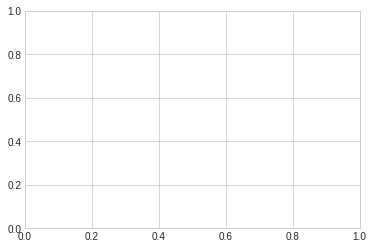

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

normal = np.linspace(0,7952)
ax.plot(normal, np.sin(attac),label='Normal');

attackdos = np.linspace(0,5825)
ax.plot(attackdos, np.sin(attac),label='Attack Dos'); 

attackprobe = np.linspace(0,1217)
ax.plot(attackprobe, np.sin(attac),label='Attack Probe'); 

plt.legend();

In [ ]:
def counter():
    a=0
    b=0
    for x in p['prediction']:
        if x=='normal':
            a=a+1
            return a
        else:
            b=b+1
            return b
if __name__=='__main__':
    counter()

In [ ]:
counter()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("accuracy= %g " %  (accuracy))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

acc = np.linspace(0,0.961113 )
ax.plot(attac, np.sin(acc),label='Accuracy');

err = np.linspace(0,0.0388867 )
ax.plot(norm, np.sin(err),linestyle='--',label='Error');
plt.legend();

In [ ]:
import seaborn as sns